## preparation summary
·Algorithms

    -Sorting
    -Searching
    -

·Basic method preparation

    -Read from excel/csv
    -split strings
    -Numpy array opearation
    -Data analysis in Pandas
·Basic data structure
    
    -Array
        *bisect

    -List
        *Merge two list
        *Sorting
        *Find Max/2nd Max/Min/2nd Min
        
    
    -DataFrame
    
    -Dict
    
·time series prediction

    
    
    
    


In [342]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")



# Numpy

In [75]:
# random simulation
x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Three-dimensional array
print("x2 shape:", x2.shape)
print("x2 size: ", x2.size)
x2

x2 shape: (3, 4)
x2 size:  12


array([[7, 7, 1, 1],
       [3, 5, 4, 3],
       [3, 0, 4, 2]])

In [76]:
# subarray
x = np.arange(10)
x[:5]  # first five elements
x[5:]  # elements after index 5
x[::2]  # every other element
x[1:6:2]  # every other element, starting at index 1, ending at 6, every 2 element
x[::-1]  # all elements, every -1 elements, reversed


# multi-demensional subarrays
x2
x2[:2, :3]
x2[:, ::2]  # all rows, every other column
x2[::-1, ::-1] # reverse all rows and columns

grid = np.arange(1, 10).reshape((3, 3)) #reshape the array
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [78]:
# Concatenation and Splitting of arrays
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
xy = np.concatenate([x, y])

grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

print(np.concatenate([grid, grid],axis=1)) # concatenate along the second axis=1(row combination)

x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5]) # split the list into array, index number is 3, 5
print(x1, x2, x3)

[[1 2 3 1 2 3]
 [4 5 6 4 5 6]]
[1 2 3] [99 99] [3 2 1]


In [83]:
import pandas as pd
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape


(365,)

In [90]:
x = np.array([2, 1, 4, 3, 5])
x.sort()
print(x)

x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)# return the indices of the sorted elements
print(i)

[1 2 3 4 5]
[1 0 3 2 4]


# Pandas

In [91]:
# Series object
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [93]:
# DataFrame object
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

states = pd.DataFrame({'population': population,
                       'area': area})
# states.index
# states.columns
# DataFrame.index
# DataFrame.columns
# DataFrame.values
# DataFrame.shape


,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [128]:
# First, the loc attribute allows indexing and slicing that always references the explicit index:

display(states.loc[:"California",:"population"]) # loc looks for index name
display(states.iloc[:3,:2]) #iloc looks for Python-style index [rows, columns]

,population
California,38332521


,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297


In [134]:
#filling NAN
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

# forward-fill
data.fillna(method='ffill')
data.fillna(method='bfill')

df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df.fillna(method='ffill', axis=0)

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,2.0,4.0,6


In [149]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
pd.concat([df1, df2],axis = 0)
df1.append(df2)

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [156]:
# sort list
intervals = [[0,30],[2,14],[3,6]]
intervals.sort(key = lambda x:x[1],reverse = False)
intervals

[[3, 6], [2, 14], [0, 30]]

In [390]:
# Timeseries prediction
df = pd.read_csv("data/TSLA.csv")
df.head(5)
df.shape
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,64.594124,65.883341,63.272302,64.642060,64.642060,3.979012e+07
std,33.400757,34.457933,32.308613,33.518742,33.518742,2.928062e+07
min,28.464001,30.993999,28.209999,28.733999,28.733999,3.540000e+06
25%,45.861999,46.425002,45.063001,45.887001,45.887001,2.158075e+07
50%,56.765999,57.888000,55.776001,56.945999,56.945999,3.081300e+07
75%,67.962001,69.039001,66.736000,67.790001,67.790001,4.658400e+07
max,281.002014,285.899994,270.256012,278.855988,278.855988,3.046940e+08


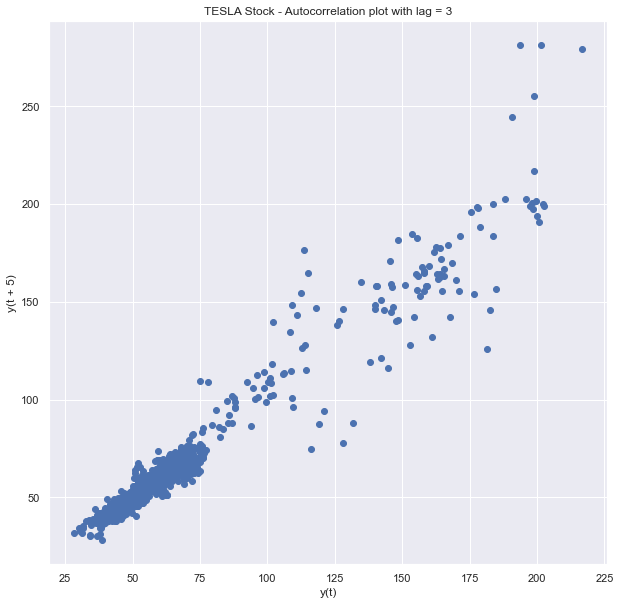

In [391]:
plt.figure()
lag_plot(df['Open'], lag=5,c = "b")
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

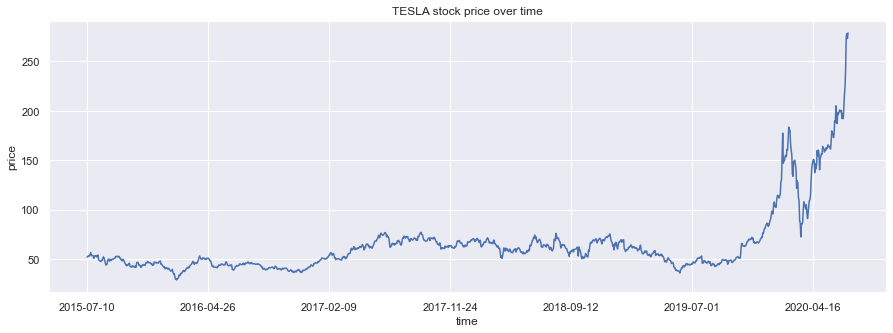

In [392]:
fig, axes = plt.subplots(1,1,figsize = (15,5))
axes.plot(df["Date"], df["Close"])

plt.xticks(np.arange(0,1259, 200), df['Date'][0:1259:200])
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [393]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"],model = "additive",period = 365)
plt.rcParams.update({"figure.figsize":(10,10)})
#result.plot()

In [337]:
import statsmodels.api as sm
import itertools
def evaluate_SARIMAX_aic(data, max_p,max_d,max_q,min_p=0,min_d=0,min_q=0):
    p,d,q = range(min_p,max_p+1),range(min_d,max_d+1),range(min_q,max_q+1)
    pdq = list(itertools.product(p,d,q))
    seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]

    min_aic = float("inf")
    ans_pdq = (0,0,0)
    ans_sea_pdq = (0,0,0)
    for param in pdq:
        for param_sea in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(data,
                                           order = param,
                                           seasonal_order = param_sea,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            result = mod.fit()
            if result.aic < min_aic:
                min_aic = result.aic
                ans_pdq = param
                ans_sea_pdq = param_sea
            print(f"SARIMA{param}x{param_sea} - AIC:{result.aic}")
            
    return ans_pdq,ans_sea_pdq
    
def evaluate_ARIMA_aic(data, max_p,max_d,max_q,min_p=0,min_d=0,min_q=0):
    p,d,q = range(min_p,max_p+1),range(min_d,max_d+1),range(min_q,max_q+1)
    pdq = list(itertools.product(p,d,q))

    min_aic = float("inf")
    ans_pdq = (0,0,0)

    for param in pdq:
        try:
            mod = ARIMA(data,
                       order = param
                       )
            result = mod.fit()

            if result.aic < min_aic:
                min_aic = result.aic
                ans_pdq = param

            print(f"ARIMA{param}- AIC:{result.aic}")
        except:
            continue
            
    return ans_pdq
    
param = evaluate_ARIMA_aic(data["T_mu"],max_p = 5,max_d = 2,max_q = 5)
        

ARIMA(0, 0, 0)- AIC:9480.759523738558
ARIMA(0, 0, 1)- AIC:8080.932229158176
ARIMA(0, 0, 2)- AIC:7338.789014804042
ARIMA(0, 0, 3)- AIC:6887.2928570094455
ARIMA(0, 0, 4)- AIC:6655.324941772993
ARIMA(0, 0, 5)- AIC:6518.303646631043
ARIMA(0, 1, 0)- AIC:5994.11866980955
ARIMA(0, 1, 1)- AIC:5995.239230438709
ARIMA(0, 1, 2)- AIC:5967.911054469145
ARIMA(0, 1, 3)- AIC:5956.201895257891
ARIMA(0, 1, 4)- AIC:5939.301369718773
ARIMA(0, 1, 5)- AIC:5937.14618794652
ARIMA(0, 2, 0)- AIC:6951.446248419582
ARIMA(0, 2, 1)- AIC:5999.7018463492695
ARIMA(0, 2, 2)- AIC:6000.872150894349
ARIMA(0, 2, 3)- AIC:5973.9292928436935
ARIMA(0, 2, 4)- AIC:5962.486878964914
ARIMA(0, 2, 5)- AIC:5945.863594140304
ARIMA(1, 0, 0)- AIC:5978.05412506812
ARIMA(1, 0, 1)- AIC:5980.033591490092
ARIMA(1, 0, 2)- AIC:5961.328350339211
ARIMA(1, 0, 3)- AIC:5953.874676746631
ARIMA(1, 0, 4)- AIC:5940.253105539405
ARIMA(1, 0, 5)- AIC:5939.06396820116
ARIMA(1, 1, 0)- AIC:5995.459108312449
ARIMA(1, 1, 1)- AIC:5943.1873958139295
ARIMA(1, 1, 

In [394]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
#plot_pacf(data["T_mu"], alpha=0.1, lags=20)

In [395]:
pct = 0.9
train_data, test_data = df[0:int(len(df)*pct)], df[int(len(df)*pct):]
training_data = train_data['Close'].values
testing_data = test_data['Close'].values


In [396]:
mod = ARIMA(training_data,
           order = param)

results=mod.fit()

0        51.830002
1        52.431999
2        53.130001
3        52.627998
4        53.335999
           ...    
1254    241.731995
1255    274.316010
1256    277.971985
1257    273.175995
1258    278.855988
Name: Close, Length: 1259, dtype: float64

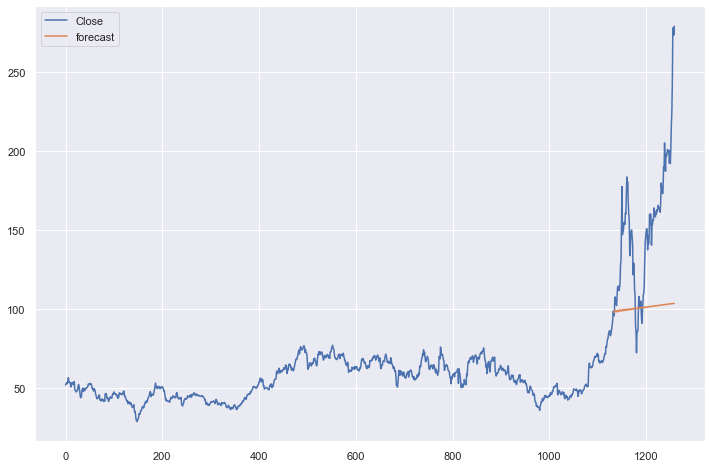

In [414]:

future = results.forecast(len(test_data))
f = []
test_data["forecast"] = pd.array(future[0])

new_data = train_data.append(test_data)
new_data[['Close','forecast']].plot(figsize=(12,8))
new_data["Close"]

In [ ]:
results.

In [361]:
pct = 0.9

train_data, test_data = df[0:int(len(df)*pct)], df[int(len(df)*pct):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values

history = training_data.tolist()

model_predictions = []
N_test_observations = len(test_data)

In [362]:
data = pd.read_csv("data/weather_data_test.csv",parse_dates = ['datetime'],sep = ";",decimal = ",",infer_datetime_format = True)
data = data[["datetime","T_mu"]]
data

,datetime,T_mu
0,2015-09-03,13.737500
1,2015-09-04,14.825000
2,2015-09-05,14.275000
3,2015-09-06,13.125000
4,2015-09-07,12.087500
...,...,...
1341,2019-05-17,13.783333
1342,2019-05-18,15.508333
1343,2019-05-19,16.595833
1344,2019-05-20,17.258333


In [283]:
result = seasonal_decompose(data.T_mu,model = "additive",extrapolate_trend="freq", freq= 365)
plt.rcParams.update({"figure.figsize":(10,10)})
#result.plot()